In [1]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.1 MB/s eta 0:00:00


# 선형 분류 모델의 결정 경계

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import mglearn
from sklearn.linear_model import LogisticRegression   # 선형모델 , 그렇지만 분류 /규제 가
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')


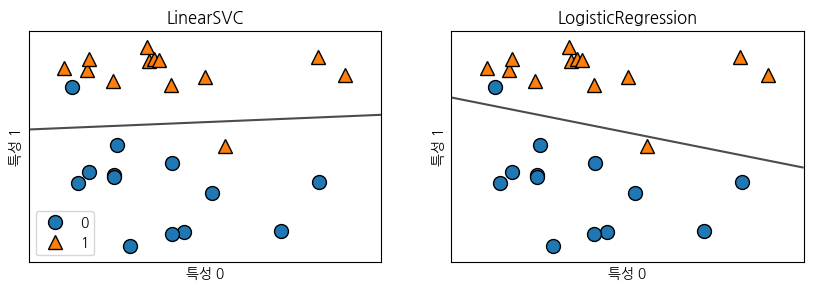

In [5]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

## LogisticRegression 규제에 따른 결정경계 확인

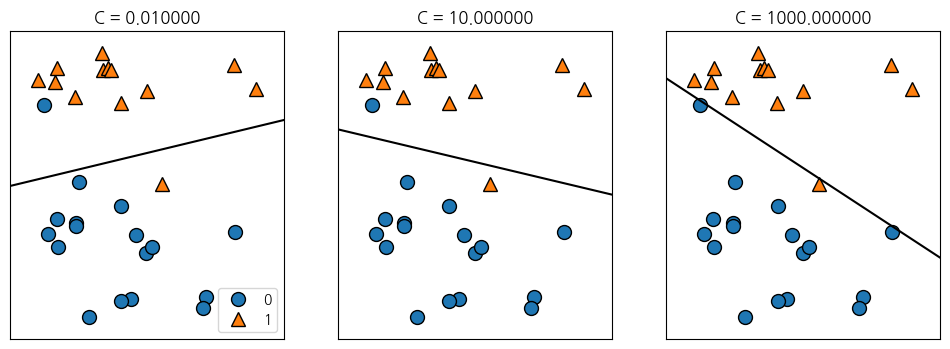

In [6]:
# C=1 규제(공부를 덜 시키겠다 -> 과대적합을 피하겠다) 설정 값
# C 설정 값이 낮으면 ex) 0.01, 0.001 -> 규제 강화 -> 일반화 -> 과소적합
# C 설정 값이 높으면 ex) 10, 100, 1000 -> 규제 완화 -> 과대적합

mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 로지스틱 회귀 성능평가



*   규제 강도를 결정하는 c 설정에 따른 성능 비교
*   기본 c = 1, 규제를 강화 c = 0, 규제 완화 c = 100



### 데이터 준비하기

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 가져오기

cancer = load_breast_cancer()

# 성능평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test =  train_test_split(cancer.data, cancer.target,
                                                     stratify=cancer.target, # 비율 보정
                                                     random_state = 7)

In [16]:
X_train.shape

(426, 30)

In [17]:
X_test.shape

(143, 30)

### 모델 설정하기

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #c = 1

### 모델 학습하기

In [24]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
print("훈련데이터셋 R2:", logreg.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg.score(X_test, y_test))

훈련데이터셋 R2: 0.960093896713615
테스트데이터셋 R2: 0.9440559440559441


In [26]:
print(" 데이터 유방암의 형태: ", cancer.data.shape)

 데이터 유방암의 형태:  (569, 30)


In [29]:
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg.score(X_test, y_test))
print("-----------------------------------------------")
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg001.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg001.score(X_test, y_test))
print("-----------------------------------------------")
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg100.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg100.score(X_test, y_test))
print("-----------------------------------------------")

훈련데이터셋 R2: 0.960093896713615
테스트데이터셋 R2: 0.9440559440559441
-----------------------------------------------
훈련데이터셋 R2: 0.9295774647887324
테스트데이터셋 R2: 0.9440559440559441
-----------------------------------------------
훈련데이터셋 R2: 0.9436619718309859
테스트데이터셋 R2: 0.9440559440559441
-----------------------------------------------


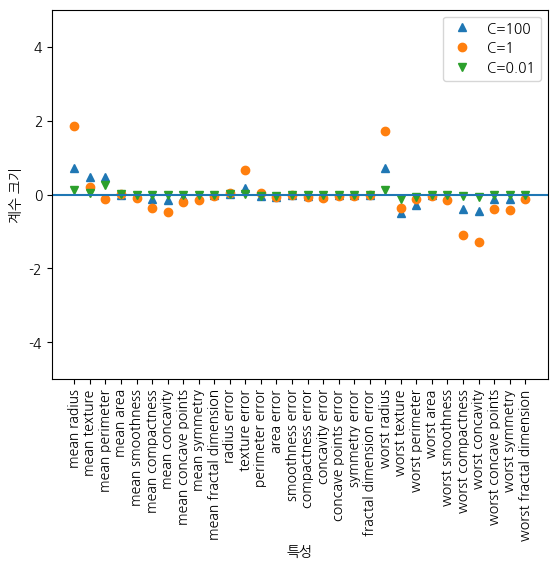

In [30]:
# L2 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

### L1 규제에 따른 성능평가

In [31]:
logreg = LogisticRegression(penalty='l1', solver = 'liblinear').fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg.score(X_test, y_test))
print("-----------------------------------------------")
logreg001 = LogisticRegression(C = 0.01,penalty='l1', solver = 'liblinear').fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg001.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg001.score(X_test, y_test))
print("-----------------------------------------------")
logreg100 = LogisticRegression(C = 100,penalty='l1', solver = 'liblinear').fit(X_train, y_train)
print("훈련데이터셋 R2:", logreg100.score(X_train, y_train))
print("테스트데이터셋 R2:", logreg100.score(X_test, y_test))
print("-----------------------------------------------")

훈련데이터셋 R2: 0.960093896713615
테스트데이터셋 R2: 0.9440559440559441
-----------------------------------------------
훈련데이터셋 R2: 0.9154929577464789
테스트데이터셋 R2: 0.916083916083916
-----------------------------------------------
훈련데이터셋 R2: 0.9859154929577465
테스트데이터셋 R2: 0.951048951048951
-----------------------------------------------


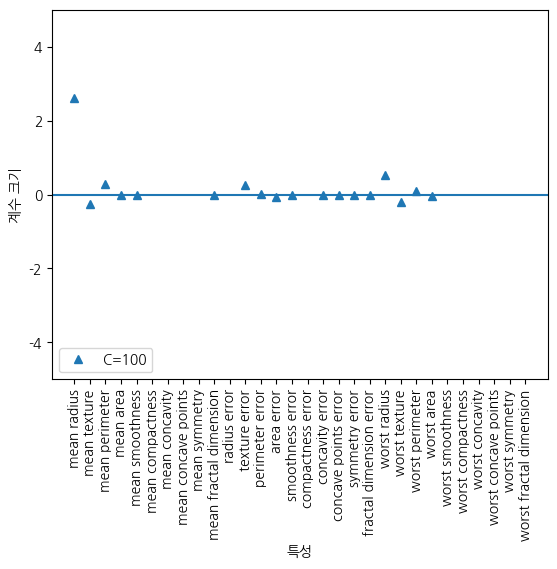

In [33]:
# L1 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
#plt.plot(logreg.coef_.T, 'o', label="C=1")
#plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

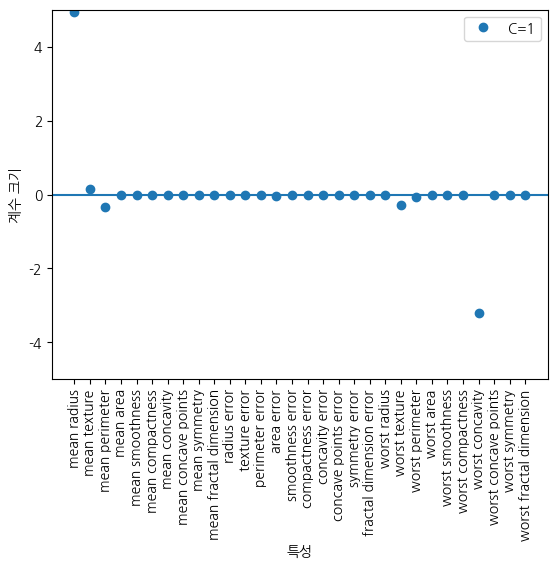

In [34]:
# L1 규제에 대한 feature들의 가중치를 확인

#plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
#plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

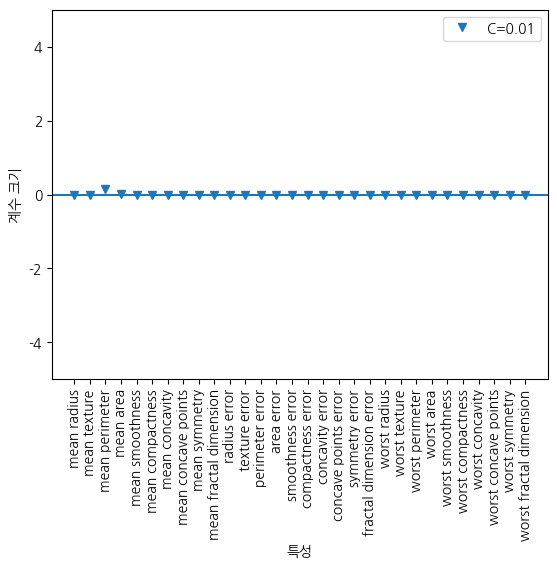

In [35]:
# L1 규제에 대한 feature들의 가중치를 확인

#plt.plot(logreg100.coef_.T, '^', label="C=100")
#plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()